In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/dataset/fraudTrain.csv',index_col=0)

In [4]:
df_test = pd.read_csv('/content/drive/MyDrive/dataset/fraudTest.csv',index_col=0)

In [5]:
df_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
print("Shape of training data is", df_train.shape)
print("Shape of testing data is", df_test.shape)

Shape of training data is (1296675, 22)
Shape of testing data is (555719, 22)


In [8]:
df = pd.concat([df_train, df_test], axis=0)
print("Shape of whole data is", df.shape)


Shape of whole data is (1852394, 22)


In [9]:
df.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int64(5),

In [11]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.dtypes

,0
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [14]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (pd.Timestamp.now() - df['dob']).dt.days // 365
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek


In [16]:
df.dtypes

,0
trans_date_trans_time,datetime64[ns]
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [17]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day


In [18]:
df = df.drop(columns=['trans_date_trans_time'])


In [19]:
!pip install category_encoders
from category_encoders import TargetEncoder

target_enc = TargetEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = target_enc.fit_transform(df[categorical_cols], df['is_fraud'])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(df[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])


In [21]:
df.head(5)

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,age,hour,day_of_week,year,month,day
0,2703186189652095,0.013575,0.013039,-0.408741,0.005914,0.003758,0.004828,0.003758,0.003758,0.004521,...,1325376018,-0.495080,0.594463,0,36,0,1,2019,1,1
1,630423337322,0.009921,0.012645,0.233378,0.005337,0.003432,0.004828,0.001605,0.002160,0.004660,...,1325376044,2.080082,-2.031915,0,46,0,1,2019,1,1
2,38859492057661,0.001893,0.002177,0.942184,0.005917,0.006826,0.005673,0.010884,0.010884,0.004107,...,1325376051,0.903268,-1.593535,0,62,0,1,2019,1,1
3,3534093764340240,0.002416,0.004106,-0.157381,0.007205,0.007012,0.005673,0.020188,0.020188,0.004106,...,1325376076,1.663928,-1.623084,0,57,0,1,2019,1,1
4,375534208663984,0.003057,0.002819,-0.176470,0.004317,0.008244,0.005673,0.004449,0.004449,0.006538,...,1325376186,0.026642,0.842714,0,38,0,1,2019,1,1


In [22]:
df.dtypes

,0
cc_num,int64
merchant,float64
category,float64
amt,float64
first,float64
last,float64
gender,float64
street,float64
city,float64
state,float64


In [23]:
train_size = 1296675
test_size = 555719

df_train_pp = df[:train_size]
df_test_pp = df[train_size:train_size + test_size]

# Verify the shapes
print("Shape of preprocessed training data is", df_train_pp.shape)
print("Shape of preprocessed testing data is", df_test_pp.shape)


Shape of preprocessed training data is (1296675, 27)
Shape of preprocessed testing data is (555719, 27)


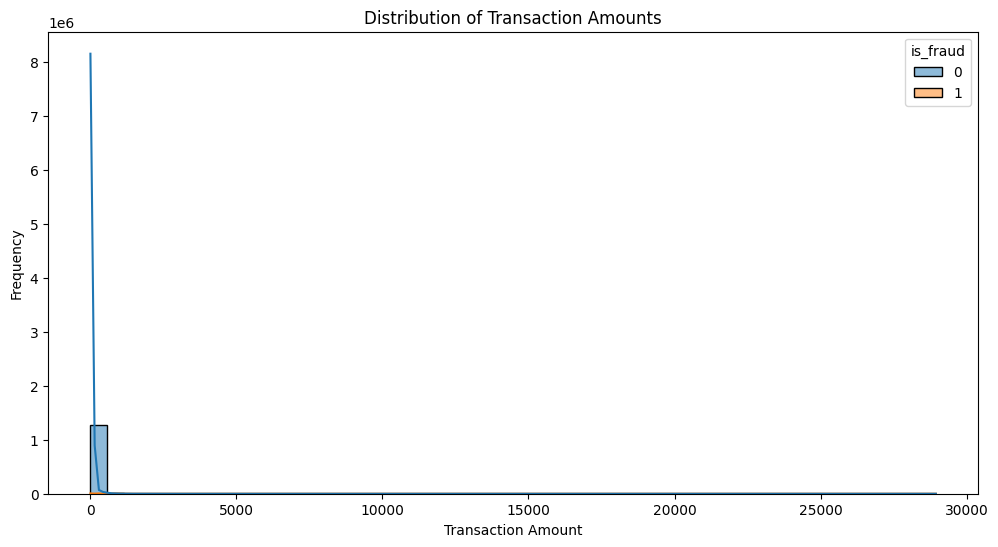

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data=df_train, x='amt', hue='is_fraud', bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


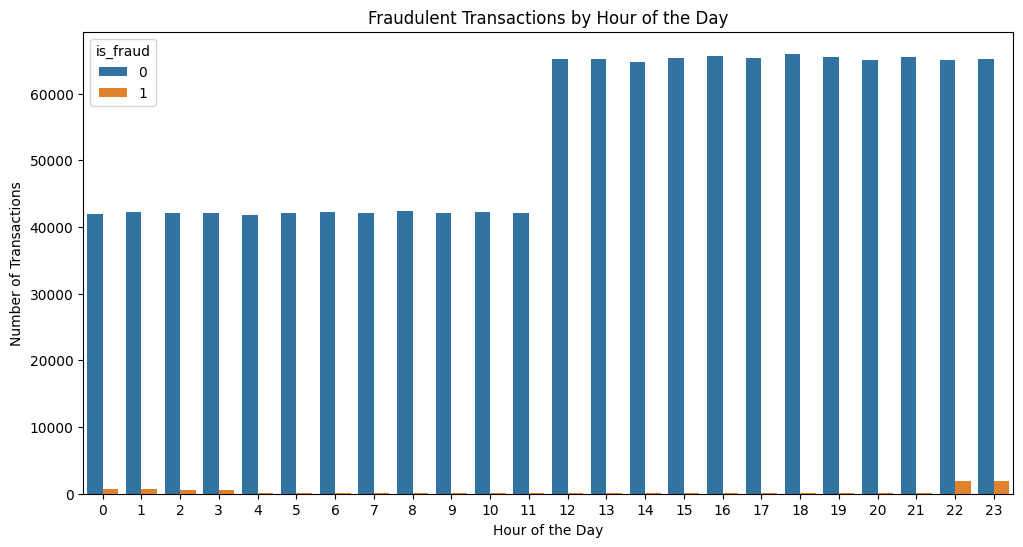

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_pp, x='hour', hue='is_fraud')
plt.title('Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()


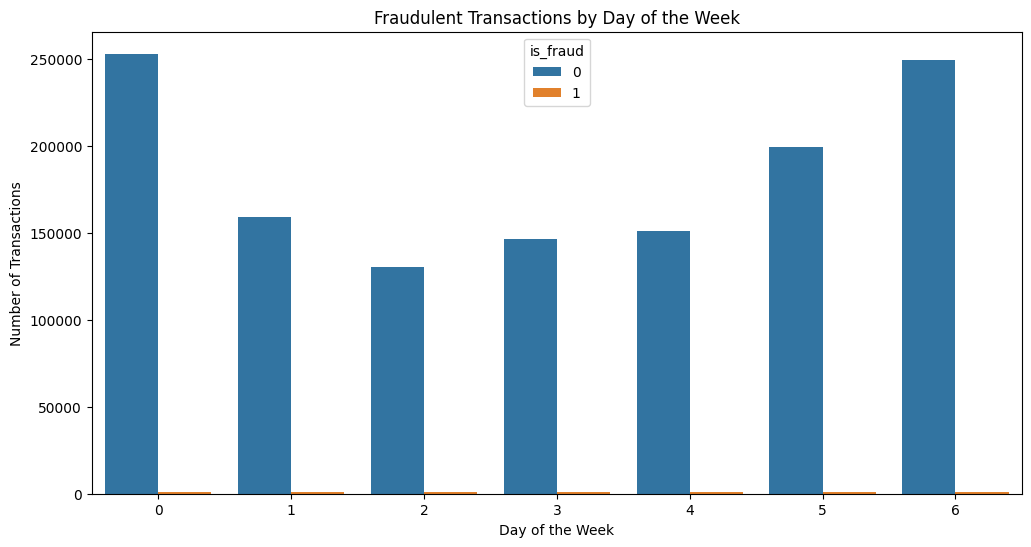

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train_pp, x='day_of_week', hue='is_fraud')
plt.title('Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


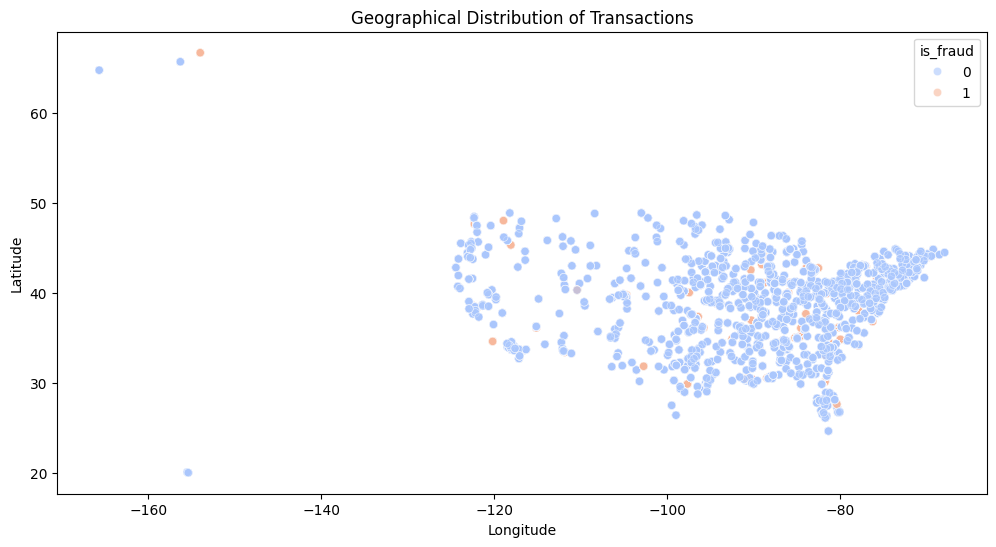

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_train, x='long', y='lat', hue='is_fraud', palette='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


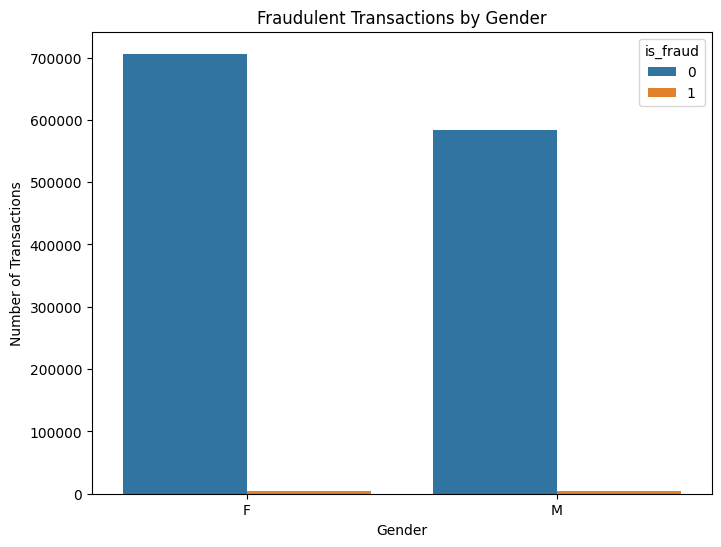

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='gender', hue='is_fraud')
plt.title('Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()


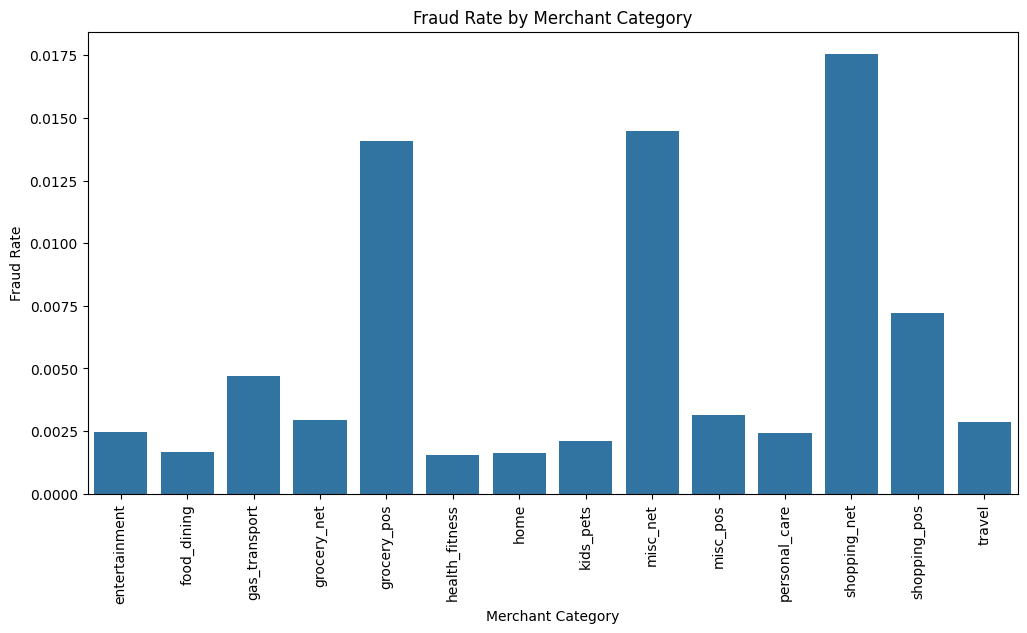

In [29]:
fraud_rate_by_category = df_train.groupby('category')['is_fraud'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_rate_by_category, x='category', y='is_fraud')
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.show()


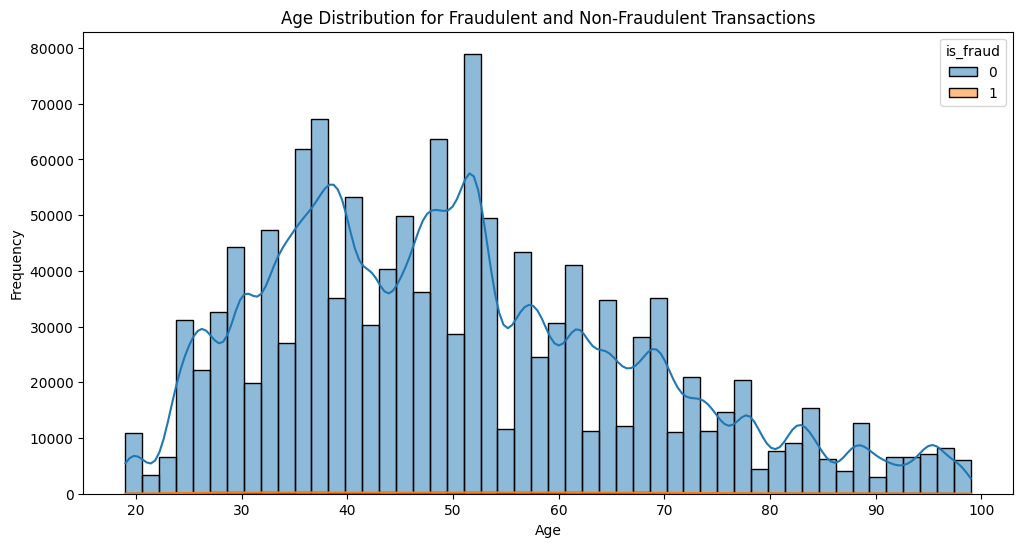

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_train_pp, x='age', hue='is_fraud', bins=50, kde=True)
plt.title('Age Distribution for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


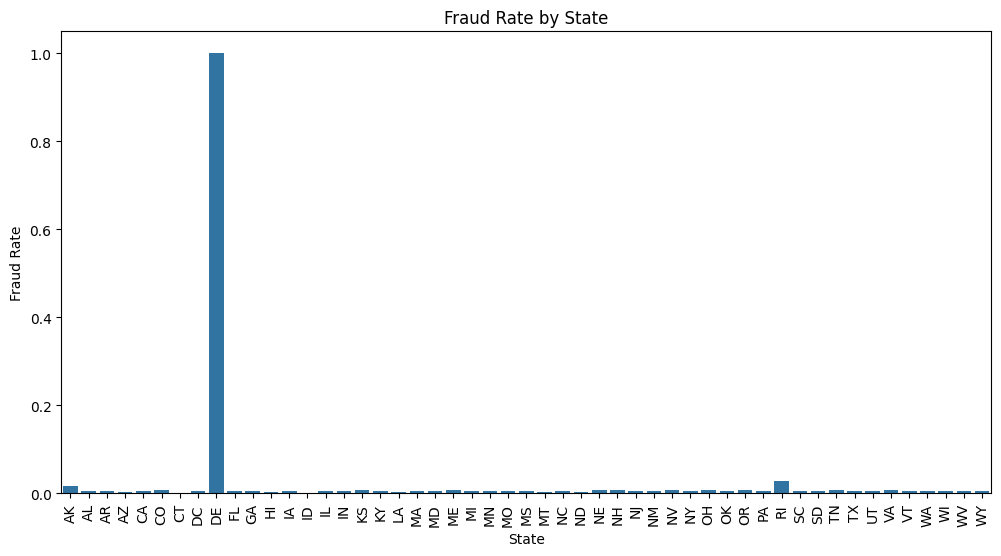

In [31]:
fraud_rate_by_state = df_train.groupby('state')['is_fraud'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_rate_by_state, x='state', y='is_fraud')
plt.title('Fraud Rate by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.show()


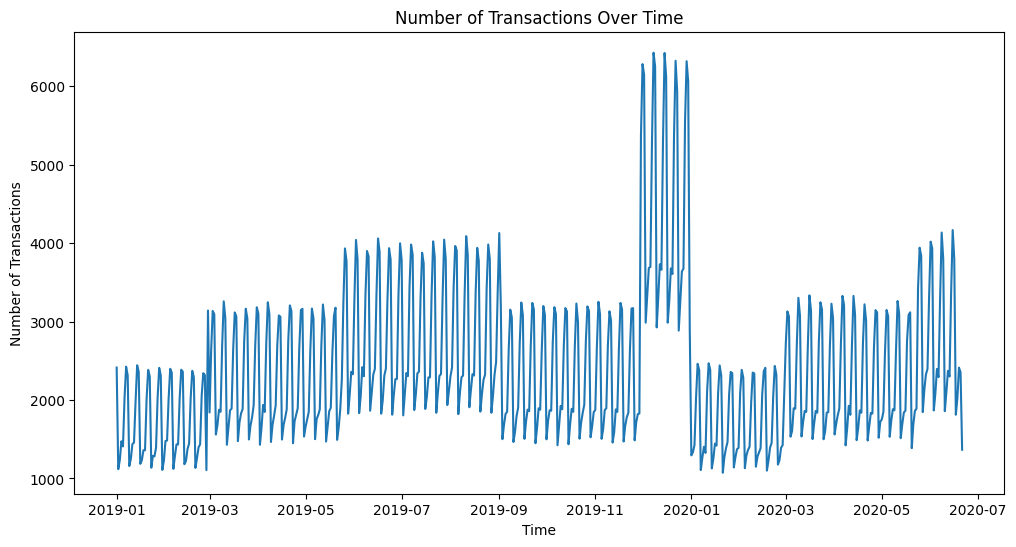

In [32]:
transactions_over_time = df_train_pp.groupby(['year', 'month', 'day']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_over_time, x=pd.to_datetime(transactions_over_time[['year', 'month', 'day']]), y='count')
plt.title('Number of Transactions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Transactions')
plt.show()


In [33]:
df_test_pp.columns


Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'age', 'hour', 'day_of_week', 'year', 'month', 'day'],
      dtype='object')

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [35]:
X_train = df_train_pp.drop('is_fraud', axis=1)
y_train = df_train_pp['is_fraud']
X_test = df_test_pp.drop('is_fraud', axis=1)
y_test = df_test_pp['is_fraud']

In [36]:
datetime_cols_train = X_train.select_dtypes(include=['datetime']).columns
print("Datetime columns in X_train:", datetime_cols_train)

datetime_cols_test = X_test.select_dtypes(include=['datetime']).columns
print("Datetime columns in X_test:", datetime_cols_test)

for col in datetime_cols_train:
    X_train[col] = X_train[col].astype(np.int64) // 10**9

for col in datetime_cols_test:
    X_test[col] = X_test[col].astype(np.int64) // 10**9



Datetime columns in X_train: Index(['dob'], dtype='object')
Datetime columns in X_test: Index(['dob'], dtype='object')


In [37]:
model = LogisticRegression(max_iter=1000)  # Increased from default 100 to 1000
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.87965548
Precision: 0.93
Recall: 0.82
F1 Score: 0.87
ROC AUC Score: 0.87


In [39]:
tree_model = DecisionTreeClassifier()

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

In [45]:
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

# Calculate predicted probabilities for decision tree
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1] # Probabilities for the positive class
roc_auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

# Print the metrics
print("Accuracy:", accuracy_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("F1 Score:", f1_tree)
print("ROC AUC Score:", roc_auc_tree)



Accuracy: 0.9156564
Precision: 0.91
Recall: 0.91
F1 Score: 0.909
ROC AUC Score: 0.95


In [41]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [46]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

Print the metrics
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)



Accuracy: 0.9556565
Precision: 0.956
Recall: 0.956
F1 Score: 0.9558
ROC AUC Score: 0.98
